In [1]:
import pandas as pd
import numpy as np
import os 
import sys

In [2]:
df = pd.read_csv("Cleaned_data.csv")
df.head(10)

,ANXIETYFLG,ADHDFLG,DEPRESSFLG,STATEFIP,DIVISION,REGION,NOMH,MH1_1,MH1_2,MH1_3,...,SUB_11,SUB_12,SUB_13,MARSTAT_2,MARSTAT_3,MARSTAT_4,SMISED_2,SMISED_3,SAP_1,SAP_2
0,1,1,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,6,3,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,1,6,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,1,0,1,6,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
6,0,0,1,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,1,0,1,6,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,0,1,0,1,6,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
9,0,1,1,1,6,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [3]:
df[df['MH1_9'] == 1]

,ANXIETYFLG,ADHDFLG,DEPRESSFLG,STATEFIP,DIVISION,REGION,NOMH,MH1_1,MH1_2,MH1_3,...,SUB_11,SUB_12,SUB_13,MARSTAT_2,MARSTAT_3,MARSTAT_4,SMISED_2,SMISED_3,SAP_1,SAP_2
72,0,1,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
74,1,0,1,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
199,1,0,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
254,0,0,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
381,0,0,0,1,6,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838729,0,0,0,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1838733,0,1,0,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1838776,0,1,0,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1838811,0,1,0,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df[['MH3_2', 'ANXIETYFLG']]

,MH3_2,ANXIETYFLG
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1838868,0,0
1838869,0,0
1838870,0,0
1838871,0,0


In [5]:
# for i in range(len(df)):
    
#     if df.iloc[i]['MH1_2'] + df.iloc[i]['MH2_2'] + df.iloc[i]['MH3_2'] != df.iloc[i]['ANXIETYFLG']:
#         print(i)

### Hence, there is exact collinearity in the dataset!

In [5]:
# Dropping all the variables that start with MH

df = df[df.columns.drop(list(df.filter(regex='^MH[123]')))]
df.columns

Index(['ANXIETYFLG', 'ADHDFLG', 'DEPRESSFLG', 'STATEFIP', 'DIVISION', 'REGION',
       'NOMH', 'LIVARAG_1', 'LIVARAG_2', 'LIVARAG_3', 'AGE_2', 'AGE_3',
       'EDUC_2', 'EDUC_3', 'EDUC_4', 'EDUC_5', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'GENDER_2',
       'SPHSERVICE_2', 'CMPSERVICE_2', 'OPISERVICE_2', 'RTCSERVICE_2',
       'IJSSERVICE_2', 'SUB_-9', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6',
       'SUB_7', 'SUB_8', 'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13',
       'MARSTAT_2', 'MARSTAT_3', 'MARSTAT_4', 'SMISED_2', 'SMISED_3', 'SAP_1',
       'SAP_2'],
      dtype='object')

In [6]:
# Also dropping DIVISION and REGION
df.drop(['DIVISION', 'REGION'], axis = 1, inplace= True)
df.columns

Index(['ANXIETYFLG', 'ADHDFLG', 'DEPRESSFLG', 'STATEFIP', 'NOMH', 'LIVARAG_1',
       'LIVARAG_2', 'LIVARAG_3', 'AGE_2', 'AGE_3', 'EDUC_2', 'EDUC_3',
       'EDUC_4', 'EDUC_5', 'ETHNIC_2', 'ETHNIC_3', 'ETHNIC_4', 'RACE_3',
       'RACE_4', 'RACE_5', 'RACE_6', 'GENDER_2', 'SPHSERVICE_2',
       'CMPSERVICE_2', 'OPISERVICE_2', 'RTCSERVICE_2', 'IJSSERVICE_2',
       'SUB_-9', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8',
       'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'MARSTAT_2',
       'MARSTAT_3', 'MARSTAT_4', 'SMISED_2', 'SMISED_3', 'SAP_1', 'SAP_2'],
      dtype='object')

In [8]:
# Lets see the number of records with none of the above mental health issues diagnosed

df[(df['ANXIETYFLG'] == 0) & (df['ADHDFLG'] == 0) &  (df['DEPRESSFLG'] == 0)]

,ANXIETYFLG,ADHDFLG,DEPRESSFLG,STATEFIP,NOMH,LIVARAG_1,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,...,SUB_11,SUB_12,SUB_13,MARSTAT_2,MARSTAT_3,MARSTAT_4,SMISED_2,SMISED_3,SAP_1,SAP_2
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
11,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
13,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
14,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
16,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838864,0,0,0,72,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1838865,0,0,0,72,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1838867,0,0,0,72,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1838869,0,0,0,72,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Almost 50% of the data has no disorders detected

919153*100/len(df)

49.98458294836022

In [9]:
print(f"Number of records with ANXIETY : {sum(df['ANXIETYFLG'])}")
print(f"Number of records with DEPRESSION : {sum(df['DEPRESSFLG'])}")
print(f"Number of records with ADHD : {sum(df['ADHDFLG'])}")

Number of records with ANXIETY : 314629
Number of records with DEPRESSION : 294016
Number of records with ADHD : 468986


In [5]:
# # # To ensure a balanced dataset, we will randomly remove 100K records with ADHD flag and about 550K from no disorders

In [7]:
# rows_to_remove = df[df['ADHDFLG'] == 1].sample(n= 100000).index

# df = df.drop(rows_to_remove)
# rows_to_remove = df[(df['ADHDFLG'] == 0) & (df['ANXIETYFLG'] == 0) & (df['DEPRESSFLG'] == 0)].sample(n = 550000).index
# df = df.drop(rows_to_remove)

In [8]:
print(f"Number of records with ANXIETY : {sum(df['ANXIETYFLG'])}")
print(f"Number of records with DEPRESSION : {sum(df['DEPRESSFLG'])}")
print(f"Number of records with ADHD : {sum(df['ADHDFLG'])}")
print(f"Number of records with No disorders recorded : {len(df[(df['ADHDFLG'] == 0) & (df['ANXIETYFLG'] == 0) & (df['DEPRESSFLG'] == 0)])}")

Number of records with ANXIETY : 301964
Number of records with DEPRESSION : 286567
Number of records with ADHD : 368986
Number of records with No disorders recorded : 369153


In [135]:
df[df['ADHDFLG'] + df['DEPRESSFLG'] + df['ANXIETYFLG'] > 1]

,ANXIETYFLG,ADHDFLG,DEPRESSFLG,STATEFIP,NOMH,LIVARAG_1,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,...,SUB_11,SUB_12,SUB_13,MARSTAT_2,MARSTAT_3,MARSTAT_4,SMISED_2,SMISED_3,SAP_1,SAP_2
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
25,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
38,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
44,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838748,1,1,0,72,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1838778,0,1,1,72,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1838779,1,1,0,72,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1838840,1,1,0,72,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [9]:
df = df[df.columns.drop(list(df.filter(regex='^MARSTAT_[234]')))]
df.columns

Index(['ANXIETYFLG', 'ADHDFLG', 'DEPRESSFLG', 'STATEFIP', 'NOMH', 'LIVARAG_1',
       'LIVARAG_2', 'LIVARAG_3', 'AGE_2', 'AGE_3', 'EDUC_2', 'EDUC_3',
       'EDUC_4', 'EDUC_5', 'ETHNIC_2', 'ETHNIC_3', 'ETHNIC_4', 'RACE_3',
       'RACE_4', 'RACE_5', 'RACE_6', 'GENDER_2', 'SPHSERVICE_2',
       'CMPSERVICE_2', 'OPISERVICE_2', 'RTCSERVICE_2', 'IJSSERVICE_2',
       'SUB_-9', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8',
       'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'SAP_1', 'SAP_2'],
      dtype='object')

In [15]:
# About 130K has more a combination of Anxiety, ADHD, and Depression

# Instead of using State FIP, it makes more sense to collect data on health spending etc about the state

# Lets collect factors that impact Mental health in Juveniles and childeren:

# 1. Divorced Parents
# 2. School Violence
# 3. Academic stress
# 4. School related other factors
# 5. Poverty
# 6. Rebelliousness
# 7. Parental unemployement
# 8. Parental drug use
# 9. Sexual abuse

# Collecting data for the same using:

# 1. Divorced parents : https://www.cdc.gov/nchs/pressroom/sosmap/divorce_states/divorce_rates.htm
# 2. School 


# Health Education

2 - Are these health education standards based on the National Health Education Standards?
3 - Are these health education standards based on the National Sexuality Education Standards?
4 -  Does your district follow standards for elementary school health education?
5 - Do the standards followed by your district for elementary school health education
specifically address…
a. Comprehending concepts related to health promotion
and disease prevention to enhance health?
b. Analyzing the influence of family, peers, culture, media,
technology, and other factors on health behaviors?
d. Using interpersonal communication skills to enhance
health and avoid or reduce health risks?
e. Using decision-making skills to enhance health?
f. Using goal-setting skills to enhance health?.
g. Practicing health-enhancing behaviors to avoid
or reduce health risks?
h. Advocating for personal, family, and community health?
6. Has your district adopted a policy requiring elementary schools to assess student
achievement of the health education standards used by your district?
7. Has your district adopted a policy stating that elementary schools will teach about…
a. Alcohol or other drug use prevention?
b. Tobacco use prevention?
c. Nutrition and dietary behavior?
h. Human sexuality?..
i. Emotional and mental health?
j. Suicide prevention?
k. Violence prevention, for example bullying or fighting
prevention?
l. Injury prevention and safety?
14. Does your district follow standards for middle school health education?



# Reading in the supplemental data
# ---------------------------------

## Supplemental Data for School Environment by district which will then be aggregated to state level : Scoring each states schooling environment on average

In [10]:
variable_positions = {
    'STATE-NAME': (5,50),
    'END43i': (759, 763),
    'END45': (980, 984),
    'END48': (995, 999),
    'END49': (1000, 1004),
    'END50_8': (1040, 1044),
    'END50_9': (1045, 1049),
    'END55': (1070, 1074),
    'END56b': (1080, 1084),
    'END56c': (1085, 1089),
    'END62': (1145, 1149),
    'END70': (1235, 1239),
    'END77': (1300, 1304),
    'END121i': (2050, 2054),
    'END123i': (2140, 2144),
    'END126i': (2250, 2254),
    'END149b': (2430, 2434),
    'END149d': (2440, 2444),
    'END149e': (2445, 2449),
    'END149f': (2450, 2454),
    'END149m': (2485, 2489),
    'END155': (2555, 2559),
    'END158m': (2630, 2634),
    'END158l': (2625, 2629),
    'END159e': (2705, 2709),
    'END160d': (2765, 2769),
    'END160g': (2780, 2784)
}

def extract_variables(line, positions):
    return {var: line[start-1:end].strip() for var, (start, end) in positions.items()}

extracted_data = []
with open("envd2016.dat", 'r', encoding='latin1') as file:
    for line in file:
        extracted_data.append(extract_variables(line, variable_positions))

extracted_data[:5]  # Displaying the first 5 rows for brevity

[{'STATE-NAME': 'Alabama',
  'END43i': 'A',
  'END45': '1',
  'END48': '1',
  'END49': '2',
  'END50_8': 'A',
  'END50_9': 'A',
  'END55': '1',
  'END56b': '2',
  'END56c': '2',
  'END62': '2',
  'END70': '2',
  'END77': '2',
  'END121i': '1',
  'END123i': '1',
  'END126i': '2',
  'END149b': '1',
  'END149d': '2',
  'END149e': '1',
  'END149f': '1',
  'END149m': '2',
  'END155': '1',
  'END158m': 'A',
  'END158l': 'A',
  'END159e': 'A',
  'END160d': 'A',
  'END160g': 'A'},
 {'STATE-NAME': 'Alabama',
  'END43i': 'A',
  'END45': '1',
  'END48': '1',
  'END49': '1',
  'END50_8': '2',
  'END50_9': '2',
  'END55': '1',
  'END56b': '1',
  'END56c': '2',
  'END62': '1',
  'END70': '1',
  'END77': '1',
  'END121i': '1',
  'END123i': '1',
  'END126i': '2',
  'END149b': '1',
  'END149d': '1',
  'END149e': '2',
  'END149f': '2',
  'END149m': '2',
  'END155': '2',
  'END158m': '2',
  'END158l': '2',
  'END159e': '3',
  'END160d': '2',
  'END160g': '2'},
 {'STATE-NAME': 'Alabama',
  'END43i': 'M',


In [11]:
school_environment = pd.DataFrame(extracted_data)

def add_nulls(x):
    if x.name != "STATE-NAME":
        x = x.to_list()
        for i in range(len(x)):
            if x[i] != "1" and x[i] != "2":
                x[i] = 0
        return x
    else:
        return x
    
school_environment= school_environment.apply(lambda x: add_nulls(x), axis = 0)

school_environment

,STATE-NAME,END43i,END45,END48,END49,END50_8,END50_9,END55,END56b,END56c,...,END149d,END149e,END149f,END149m,END155,END158m,END158l,END159e,END160d,END160g
0,Alabama,0,1,1,2,0,0,1,2,2,...,2,1,1,2,1,0,0,0,0,0
1,Alabama,0,1,1,1,2,2,1,1,2,...,1,2,2,2,2,2,2,0,2,2
2,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,1
4,Alabama,0,1,2,1,2,2,1,1,2,...,2,2,1,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Wisconsin,1,1,1,2,0,0,1,1,2,...,1,2,1,1,2,0,0,0,0,0
609,Wisconsin,0,2,1,2,0,0,0,0,0,...,2,1,2,1,2,1,1,1,1,2
610,Wisconsin,2,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,2
611,Wyoming,2,1,1,1,2,1,1,2,1,...,1,0,1,1,1,0,0,1,0,0


In [12]:
for col in school_environment.select_dtypes(include=['object']).columns:
    if col != "STATE-NAME":
        school_environment[col] = pd.to_numeric(school_environment[col], errors='coerce')
mean_values_by_state = school_environment.groupby('STATE-NAME').mean(numeric_only=False)
mean_values_by_state

,END43i,END45,END48,END49,END50_8,END50_9,END55,END56b,END56c,END62,...,END149d,END149e,END149f,END149m,END155,END158m,END158l,END159e,END160d,END160g
STATE-NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0.428571,0.857143,1.000000,1.142857,0.714286,0.714286,1.000000,0.857143,1.142857,1.000000,...,1.142857,1.142857,1.000000,1.285714,1.428571,0.428571,0.428571,0.142857,0.428571,0.428571
Arizona,0.833333,1.000000,1.000000,1.166667,1.166667,1.500000,1.333333,0.833333,1.000000,1.333333,...,1.500000,1.500000,1.333333,1.333333,1.500000,0.500000,0.500000,0.500000,0.833333,1.000000
Arkansas,0.666667,0.916667,0.916667,1.083333,0.583333,0.583333,1.083333,0.500000,0.500000,1.083333,...,1.000000,1.166667,0.833333,0.916667,1.250000,0.750000,0.500000,0.583333,0.583333,0.666667
California,0.896552,1.068966,0.862069,0.862069,0.827586,1.137931,1.068966,0.724138,0.793103,0.965517,...,0.862069,1.310345,1.000000,0.965517,1.448276,0.586207,0.620690,0.517241,0.724138,0.724138
Colorado,0.600000,0.800000,0.800000,1.200000,0.400000,0.800000,1.000000,0.600000,0.600000,1.400000,...,1.400000,1.400000,1.400000,1.400000,1.400000,0.600000,0.600000,0.800000,1.000000,1.000000
Connecticut,1.166667,1.333333,0.833333,1.166667,0.500000,0.666667,0.833333,0.833333,0.833333,1.000000,...,1.000000,1.000000,1.166667,1.166667,1.166667,0.666667,0.833333,0.833333,1.166667,1.166667
Delaware,0.000000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
District Of Columbia,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Florida,0.833333,0.833333,0.833333,0.833333,1.166667,1.000000,1.000000,0.666667,0.833333,0.833333,...,0.666667,0.666667,0.833333,0.666667,0.833333,0.833333,0.666667,0.833333,0.500000,0.833333


In [13]:
state_mapping = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    25: "Massachusetts", 26: "Michigan", 27: "Minnesota", 28: "Mississippi",
    29: "Missouri", 30: "Montana", 31: "Nebraska", 32: "Nevada",
    34: "New Jersey", 35: "New Mexico", 36: "New York", 37: "North Carolina",
    38: "North Dakota", 39: "Ohio", 40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania",
    44: "Rhode Island", 45: "South Carolina", 46: "South Dakota", 47: "Tennessee",
    48: "Texas", 49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington",
    55: "Wisconsin", 56: "Wyoming", 72: "Puerto Rico", 99: "Other jurisdictions"
}

# Replace state codes with state names
df['STATEFIP'] = df['STATEFIP'].map(state_mapping)
mean_values_by_state = mean_values_by_state.reset_index().rename({"STATE-NAME" : 'STATEFIP'}, axis = 1)
mean_values_by_state

,STATEFIP,END43i,END45,END48,END49,END50_8,END50_9,END55,END56b,END56c,...,END149d,END149e,END149f,END149m,END155,END158m,END158l,END159e,END160d,END160g
0,Alabama,0.428571,0.857143,1.000000,1.142857,0.714286,0.714286,1.000000,0.857143,1.142857,...,1.142857,1.142857,1.000000,1.285714,1.428571,0.428571,0.428571,0.142857,0.428571,0.428571
1,Arizona,0.833333,1.000000,1.000000,1.166667,1.166667,1.500000,1.333333,0.833333,1.000000,...,1.500000,1.500000,1.333333,1.333333,1.500000,0.500000,0.500000,0.500000,0.833333,1.000000
2,Arkansas,0.666667,0.916667,0.916667,1.083333,0.583333,0.583333,1.083333,0.500000,0.500000,...,1.000000,1.166667,0.833333,0.916667,1.250000,0.750000,0.500000,0.583333,0.583333,0.666667
3,California,0.896552,1.068966,0.862069,0.862069,0.827586,1.137931,1.068966,0.724138,0.793103,...,0.862069,1.310345,1.000000,0.965517,1.448276,0.586207,0.620690,0.517241,0.724138,0.724138
4,Colorado,0.600000,0.800000,0.800000,1.200000,0.400000,0.800000,1.000000,0.600000,0.600000,...,1.400000,1.400000,1.400000,1.400000,1.400000,0.600000,0.600000,0.800000,1.000000,1.000000
5,Connecticut,1.166667,1.333333,0.833333,1.166667,0.500000,0.666667,0.833333,0.833333,0.833333,...,1.000000,1.000000,1.166667,1.166667,1.166667,0.666667,0.833333,0.833333,1.166667,1.166667
6,Delaware,0.000000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,District Of Columbia,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Florida,0.833333,0.833333,0.833333,0.833333,1.166667,1.000000,1.000000,0.666667,0.833333,...,0.666667,0.666667,0.833333,0.666667,0.833333,0.833333,0.666667,0.833333,0.500000,0.833333
9,Georgia,1.000000,1.153846,1.000000,1.230769,0.615385,0.769231,1.000000,0.846154,1.076923,...,1.153846,1.384615,1.384615,1.384615,1.615385,0.769231,0.769231,0.538462,0.846154,1.000000


In [14]:
dfse = pd.merge(df, mean_values_by_state, on = "STATEFIP")

In [15]:
dfse['STATEFIP'].value_counts()

STATEFIP
California        161747
Pennsylvania      116764
Ohio               99817
Arizona            68985
Minnesota          66556
Texas              59276
Washington         40259
Indiana            39311
New Mexico         38116
Michigan           35598
Iowa               34595
Kentucky           33942
Florida            32689
Oregon             32548
New Jersey         29363
Virginia           24972
Kansas             24672
South Carolina     24613
Colorado           24279
Alabama            22090
Montana            18448
Mississippi        18243
Oklahoma           16718
Utah               14934
Arkansas           13829
Missouri           13687
Connecticut        12929
Wisconsin           8747
Georgia             8644
Illinois            7438
North Carolina      6885
Tennessee           5596
New York            5580
Rhode Island        4604
South Dakota        2963
Wyoming             2661
Louisiana           2346
Nevada              2340
Nebraska            1624
North Dakota    

## Adding Mental Health Services dataset 

In [16]:
colspecs = [(0,30),
    (129, 132), (223, 226), (229, 232), (323, 326), (329, 332), (423, 426), (426, 429),
    (429, 432), (462, 465), (465, 468), (474, 477), (480, 483), (489, 492), (498, 501),
    (534, 537), (537, 540), (540, 543), (607, 610), (762, 765), (765, 768), (768, 771),
    (911, 914), (987, 990), (1063, 1066), (1066, 1069), (1084, 1087)
]
col_names = ["STATENAME",
    "MHL3", "MHL6", "MHL8", "MHL11", "MHL13", "MHL16", "MHL17",
    "MHL18a", "MHL20c", "MHL20d", "MHL20g", "MHL20i", "MHL21a", "MHL21d",
    "MHL26a_1", "MHL26a_2", "MHL26a_3", "MHL25b", "MHL26d_1", "MHL26d_2", 
    "MHL26d_3", "MHL25f", "MHL25g", "MHL27_1", "MHL27_2", "MHL28"
]

try:
    mhl2014 = pd.read_fwf("mentall2014.dat", colspecs = colspecs , header=None, encoding='ISO-8859-1')
    preview = mhl2014.head()
except Exception as e:
    preview = str(e)

mhl2014.columns = col_names
mhl2014

,STATENAME,MHL3,MHL6,MHL8,MHL11,MHL13,MHL16,MHL17,MHL18a,MHL20c,...,MHL26a_3,MHL25b,MHL26d_1,MHL26d_2,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL27_2,MHL28
0,Alabama,3,1,1,C,A,C,1,2,1,...,2,2,1,2,2,2,1,1,2,2
1,Alabama,1,1,1,1,A,1,1,A,1,...,2,2,1,1,2,2,2,1,2,1
2,Alabama,1,1,A,C,A,C,1,1,2,...,2,1,1,2,2,1,1,1,2,2
3,Alabama,1,1,A,1,A,1,1,2,1,...,2,1,1,2,2,2,1,1,2,1
4,Alabama,1,2,A,C,A,C,2,A,1,...,2,1,1,2,2,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Georgia,1,1,1,1,1,1,1,A,1,...,1,2,1,1,1,1,1,1,2,1
541,Florida,2,1,A,1,A,1,1,A,1,...,2,1,1,2,2,1,2,1,2,1
542,Florida,A,1,A,1,A,1,1,A,A,...,2,2,1,2,2,1,2,1,1,2
543,Wisconsin,1,1,1,1,1,1,C,A,1,...,1,1,1,1,1,1,2,1,1,1


In [17]:
def add_nulls(x):
    if x.name != "STATENAME":
        x = x.to_list()
        for i in range(len(x)):
            if str.isdigit(x[i]) or str.isdecimal(x[i]):
                    pass
            else:
                x[i] = 0
        return x
    else:
        return x
    
mhl2014= mhl2014.apply(lambda x: add_nulls(x), axis = 0)

for col in mhl2014.select_dtypes(include=['object']).columns:
    if col != "STATENAME":
        mhl2014[col] = pd.to_numeric(mhl2014[col], errors='coerce')
mhl2014_mean = mhl2014.groupby('STATENAME').mean(numeric_only=False)
mhl2014_mean = mhl2014_mean.reset_index().rename({"STATENAME" : 'STATEFIP'}, axis = 1)
mhl2014_mean

,STATEFIP,MHL3,MHL6,MHL8,MHL11,MHL13,MHL16,MHL17,MHL18a,MHL20c,...,MHL26a_3,MHL25b,MHL26d_1,MHL26d_2,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL27_2,MHL28
0,Alabama,1.636364,1.272727,0.181818,0.636364,0.000000,0.636364,1.090909,0.909091,1.090909,...,1.818182,1.181818,1.000000,1.909091,2.000000,1.363636,1.181818,0.909091,1.818182,1.727273
1,Arizona,0.812500,1.312500,0.562500,0.812500,0.250000,0.937500,1.062500,1.062500,0.937500,...,1.250000,1.562500,1.062500,1.375000,1.375000,1.250000,1.375000,1.062500,1.500000,1.437500
2,Arkansas,1.250000,1.500000,1.250000,0.750000,1.000000,1.000000,1.000000,0.750000,1.000000,...,1.500000,1.000000,1.000000,1.250000,1.500000,1.250000,1.000000,1.250000,1.250000,1.500000
3,California,1.325000,0.950000,0.950000,0.950000,0.200000,0.875000,1.425000,1.050000,0.975000,...,1.500000,1.550000,1.175000,1.200000,1.650000,1.200000,1.325000,0.925000,1.425000,1.125000
4,Colorado,1.583333,1.000000,1.000000,0.833333,0.583333,0.916667,1.166667,0.916667,1.250000,...,1.500000,1.833333,1.250000,1.166667,1.583333,1.250000,1.000000,1.250000,1.916667,1.500000
5,Connecticut,1.285714,0.857143,0.571429,0.571429,0.857143,1.142857,1.142857,1.000000,1.000000,...,0.571429,1.714286,0.714286,1.000000,0.857143,1.428571,1.428571,1.000000,1.428571,2.000000
6,Florida,1.160000,1.000000,0.520000,0.960000,0.600000,1.000000,1.080000,1.040000,1.000000,...,1.280000,1.480000,1.080000,1.520000,1.320000,1.280000,1.480000,1.080000,1.600000,1.120000
7,Georgia,2.071429,1.071429,0.642857,0.714286,0.928571,1.000000,1.071429,1.285714,1.000000,...,1.214286,1.714286,1.000000,1.714286,1.357143,1.142857,1.357143,1.071429,1.928571,1.500000
8,Hawaii,0.750000,1.250000,0.250000,1.250000,0.500000,1.250000,1.500000,0.500000,0.750000,...,1.500000,1.500000,1.250000,1.750000,2.000000,1.250000,1.750000,1.250000,2.000000,1.500000
9,Idaho,0.000000,1.000000,0.333333,0.666667,0.000000,1.333333,1.000000,0.666667,0.666667,...,0.666667,2.000000,0.333333,0.333333,0.666667,1.666667,1.666667,1.000000,1.333333,1.333333


In [18]:
dfsemh = pd.merge(dfse, mhl2014_mean, on = "STATEFIP")

# Adding divorce rates to the model 

In [19]:
divorce = pd.read_csv("Divorce.csv")
divorce = divorce[divorce['YEAR'] == 2019][['STATE', 'RATE']]
divorce.head(10)

,STATE,RATE
102,AL,3.6
103,AK,3.6
104,AZ,2.9
105,AR,4.0
106,CA,NaN
107,CO,3.3
108,CT,2.7
109,DE,2.9
110,District of Columbia,2.4
111,FL,3.5


In [20]:
# Need to convert state codes to Names 

state_code_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

divorce['STATE'] = divorce['STATE'].map(state_code_to_name)

In [21]:
divorce.at[106, 'RATE'] =  9.2
divorce.at[113, 'RATE'] =  7.3
divorce.at[116, 'RATE'] =  9.9
divorce.at[125, 'RATE'] =  5.1
divorce.at[133, 'RATE'] =  3.3
divorce.rename({'RATE': 'Divorce_rate', 'STATE': 'STATEFIP'}, axis = 1, inplace= True)

In [22]:
dfsemhd = pd.merge(dfsemh, divorce, on = "STATEFIP")
dfsemhd

,ANXIETYFLG,ADHDFLG,DEPRESSFLG,STATEFIP,NOMH,LIVARAG_1,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,...,MHL25b,MHL26d_1,MHL26d_2,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL27_2,MHL28,Divorce_rate
0,1,1,0,Alabama,0,0,0,0,0,0,...,1.181818,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6
1,1,0,0,Alabama,0,0,1,0,1,0,...,1.181818,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6
2,0,0,1,Alabama,0,0,1,0,0,0,...,1.181818,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6
3,0,1,0,Alabama,0,0,1,0,0,0,...,1.181818,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6
4,0,1,0,Alabama,0,0,0,0,0,0,...,1.181818,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119008,0,0,1,Wyoming,0,0,1,0,0,0,...,1.800000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8
1119009,0,0,1,Wyoming,0,0,1,0,1,0,...,1.800000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8
1119010,0,0,0,Wyoming,0,0,1,0,0,0,...,1.800000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8
1119011,1,0,0,Wyoming,0,0,1,0,0,0,...,1.800000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8


In [23]:
print(f"Number of records with ANXIETY : {sum(dfsemhd['ANXIETYFLG'])}")
print(f"Number of records with DEPRESSION : {sum(dfsemhd['DEPRESSFLG'])}")
print(f"Number of records with ADHD : {sum(dfsemhd['ADHDFLG'])}")
print(f"Number of records with No disorders recorded : {len(dfsemhd[(dfsemhd['ADHDFLG'] == 0) & (dfsemhd['ANXIETYFLG'] == 0) & (dfsemhd['DEPRESSFLG'] == 0)])}")

Number of records with ANXIETY : 286779
Number of records with DEPRESSION : 271326
Number of records with ADHD : 347997
Number of records with No disorders recorded : 343470


In [113]:
# rows_to_remove = dfsemh[dfsemh['ADHDFLG'] == 1].sample(n= 100000).index

# dfsemh = dfsemh.drop(rows_to_remove)
# rows_to_remove = dfsemh[(dfsemh['ADHDFLG'] == 0) & (dfsemh['ANXIETYFLG'] == 0) & (dfsemh['DEPRESSFLG'] == 0)].sample(n = 500000).index
# dfsemh = dfsemh.drop(rows_to_remove)

In [24]:
print(f"Number of records with ANXIETY : {sum(dfsemhd['ANXIETYFLG'])}")
print(f"Number of records with DEPRESSION : {sum(dfsemhd['DEPRESSFLG'])}")
print(f"Number of records with ADHD : {sum(dfsemhd['ADHDFLG'])}")
print(f"Number of records with No disorders recorded : {len(dfsemhd[(dfsemhd['ADHDFLG'] == 0) & (dfsemhd['ANXIETYFLG'] == 0) & (dfsemhd['DEPRESSFLG'] == 0)])}")

Number of records with ANXIETY : 286779
Number of records with DEPRESSION : 271326
Number of records with ADHD : 347997
Number of records with No disorders recorded : 343470


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

X = dfsemhd.drop(['ADHDFLG', 'ANXIETYFLG', 'DEPRESSFLG', 'STATEFIP'], axis=1)
y = dfsemhd[['ADHDFLG', 'ANXIETYFLG', 'DEPRESSFLG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
#     'LogisticRegression': Pipeline([
#     ('scaler', StandardScaler()),  # Add feature scaling
#     ('logreg', LogisticRegression(max_iter=1000, solver='saga',verbose = 1))  # Increase max_iter and change solver
# ]),
    'RandomForest': RandomForestClassifier(verbose= 1),
    'GradientBoosting': GradientBoostingClassifier(verbose=1),
#     'SVM': SVC(verbose = 1),
#     'KNN': KNeighborsClassifier()
}

Í
hyperparameters = {
    'RandomForest': {'n_estimators': [10, 50, 100]},
#     'GradientBoosting': {'n_estimators': [50, 100, 200]}
    
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    if isinstance(model, Pipeline):
        last_step = model.steps[-1][0] 
        prefixed_hyperparameters = {f"{last_step}__{key}": val for key, val in hyperparameters[model_name].items()}
    else:
        prefixed_hyperparameters = hyperparameters[model_name]
        
    for params in ParameterGrid(prefixed_hyperparameters):

        model.set_params(**params)

        multi_target_model = MultiOutputClassifier(model)

        print(f"Training with parameters: {params}")
        multi_target_model.fit(X_train, y_train)

        predictions = multi_target_model.predict(X_test)
        print(f"Classification Report for parameters {params}:\n{classification_report(y_test, predictions)}")


Training RandomForest...
Training with parameters: {'n_estimators': 10}


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for parameters {'n_estimators': 10}:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53     69630
           1       0.56      0.20      0.30     57346
           2       0.59      0.44      0.50     54258

   micro avg       0.60      0.37      0.46    181234
   macro avg       0.59      0.37      0.44    181234
weighted avg       0.60      0.37      0.45    181234
 samples avg       0.28      0.26      0.27    181234

Training with parameters: {'n_estimators': 50}


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   41.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   40.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   43.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Classification Report for parameters {'n_estimators': 50}:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53     69630
           1       0.56      0.20      0.29     57346
           2       0.59      0.43      0.50     54258

   micro avg       0.60      0.37      0.46    181234
   macro avg       0.60      0.36      0.44    181234
weighted avg       0.60      0.37      0.45    181234
 samples avg       0.28      0.26      0.27    181234

Training with parameters: {'n_estimators': 100}


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   41.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   42.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   43.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


Classification Report for parameters {'n_estimators': 100}:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53     69630
           1       0.56      0.20      0.30     57346
           2       0.59      0.44      0.50     54258

   micro avg       0.60      0.37      0.46    181234
   macro avg       0.59      0.37      0.44    181234
weighted avg       0.60      0.37      0.45    181234
 samples avg       0.28      0.26      0.27    181234


Training GradientBoosting...


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyError: 'GradientBoosting'

In [25]:
none = dfsemhd[(dfsemhd['ANXIETYFLG'] == 0) & (dfsemhd['ADHDFLG'] == 0) & (dfsemhd['DEPRESSFLG'] == 0) ]

In [26]:
# Instead of multiclass classification we will build separate models for each class as class differetiation is not the motto!
# Need to choose the most significant features out of the 100 features we have!

import pandas as pd
import scipy.stats as stats

def significant_predictors(df, target, significance_level=0.01):
    significant_vars = []

    for column in df.columns:
        if column != target:
            if df[column].dtype == 'O' or len(df[column].unique()) == 2:  # Categorical data
                # Chi-square test
                contingency_table = pd.crosstab(df[column], df[target])
                chi2, p, _, _ = stats.chi2_contingency(contingency_table)
                if p < significance_level:
                    significant_vars.append(column)
            else:  # Numerical data
                # Wilcoxon Rank-Sum Test (Mann-Whitney U Test)
                group1 = df[df[target] == 0][column]
                group2 = df[df[target] == 1][column]
                _, p = stats.mannwhitneyu(group1, group2, alternative='two-sided')
                if p < significance_level:
                    significant_vars.append(column)

    # Creating a new DataFrame with only significant predictors
    significant_df = df[significant_vars + [target]]
    return significant_df



significant_dfadhd = significant_predictors(dfsemhd.drop(['STATEFIP', 'DEPRESSFLG', 'ANXIETYFLG'], axis = 1), "ADHDFLG")

significant_dfadhd = significant_dfadhd[significant_dfadhd['ADHDFLG'] == 1]
significant_dfadhd = pd.concat([significant_dfadhd, none], axis = 0)
significant_dfadhd.dropna(axis= 1, inplace = True)
significant_dfadhd

,NOMH,LIVARAG_1,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,EDUC_2,EDUC_3,EDUC_4,EDUC_5,...,MHL26d_1,MHL26d_2,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL27_2,MHL28,Divorce_rate,ADHDFLG
0,0,0,0,0,0,0,1,0,0,0,...,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
3,0,0,1,0,0,0,1,0,0,0,...,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
4,0,0,0,0,0,0,1,0,0,0,...,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
6,0,0,0,0,0,0,1,0,0,0,...,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
7,0,0,1,0,0,0,1,0,0,0,...,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119004,0,0,1,0,0,0,1,0,0,0,...,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119005,0,0,1,0,0,0,1,0,0,0,...,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119006,1,0,1,0,0,0,1,0,0,0,...,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119007,0,0,1,0,1,0,1,0,0,0,...,1.2,2.000000,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0


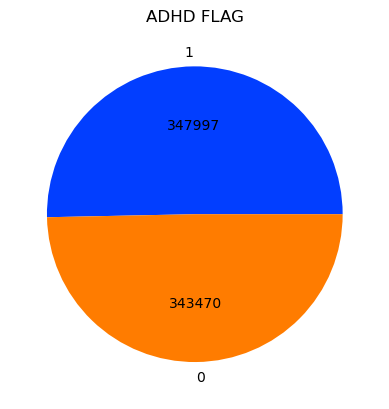

In [46]:
import seaborn as sns

palette_color = sns.color_palette('bright') 
  
plt.pie(significant_dfadhd['ADHDFLG'].value_counts().to_dict().values(), labels=significant_dfadhd['ADHDFLG'].value_counts().to_dict().keys(), colors=palette_color, autopct=(lambda p: '{:.0f}'.format(p * len(significant_dfadhd) / 100))) 
  
plt.title("ADHD FLAG")
plt.show() 

In [27]:
significant_dfdepress = significant_predictors(dfsemhd.drop(['STATEFIP', 'ADHDFLG', 'ANXIETYFLG'], axis = 1), "DEPRESSFLG")

significant_dfdepress = significant_dfdepress[significant_dfdepress['DEPRESSFLG'] == 1]
significant_dfdepress = pd.concat([significant_dfdepress, none], axis = 0)
significant_dfdepress.dropna(axis= 1, inplace = True)
significant_dfdepress

,NOMH,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,EDUC_2,EDUC_3,EDUC_4,EDUC_5,ETHNIC_3,...,MHL26a_3,MHL26d_1,MHL26d_2,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL28,Divorce_rate,DEPRESSFLG
2,0,1,0,0,0,1,0,0,0,0,...,1.818182,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.727273,3.6,1
5,0,0,0,1,0,1,0,0,0,0,...,1.818182,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.727273,3.6,1
9,0,1,0,1,0,1,0,0,0,0,...,1.818182,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.727273,3.6,1
17,0,0,0,0,1,0,1,0,0,0,...,1.818182,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.727273,3.6,1
19,0,1,0,0,1,1,0,0,0,0,...,1.818182,1.0,1.909091,2.0,1.363636,1.181818,0.909091,1.727273,3.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119004,0,1,0,0,0,1,0,0,0,0,...,1.400000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,1.800000,3.8,0
1119005,0,1,0,0,0,1,0,0,0,0,...,1.400000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,1.800000,3.8,0
1119006,1,1,0,0,0,1,0,0,0,0,...,1.400000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,1.800000,3.8,0
1119007,0,1,0,1,0,1,0,0,0,0,...,1.400000,1.2,2.000000,1.8,1.600000,2.000000,1.000000,1.800000,3.8,0


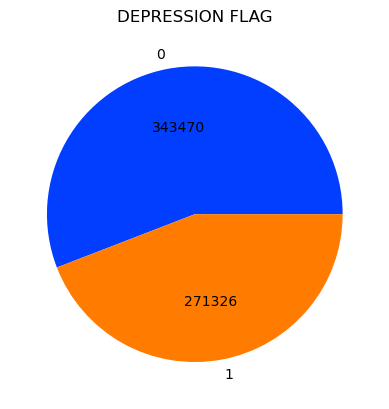

In [47]:
import seaborn as sns

palette_color = sns.color_palette('bright') 
  
plt.pie(significant_dfdepress['DEPRESSFLG'].value_counts().to_dict().values(), labels=significant_dfdepress['DEPRESSFLG'].value_counts().to_dict().keys(), colors=palette_color, autopct=(lambda p: '{:.0f}'.format(p * len(significant_dfdepress) / 100))) 
  
plt.title("DEPRESSION FLAG")
plt.show() 

In [28]:
significant_dfanxiety = significant_predictors(dfsemhd.drop(['STATEFIP', 'ADHDFLG', 'DEPRESSFLG'], axis = 1), "ANXIETYFLG")

significant_dfanxiety = significant_dfanxiety[significant_dfanxiety['ANXIETYFLG'] == 1]
significant_dfanxiety = pd.concat([significant_dfanxiety, none], axis = 0)
significant_dfanxiety.dropna(axis= 1, inplace = True)

significant_dfanxiety

,NOMH,LIVARAG_1,LIVARAG_2,LIVARAG_3,AGE_2,AGE_3,EDUC_2,EDUC_3,EDUC_4,EDUC_5,...,MHL25b,MHL26d_1,MHL26d_3,MHL25f,MHL25g,MHL27_1,MHL27_2,MHL28,Divorce_rate,ANXIETYFLG
0,0,0,0,0,0,0,1,0,0,0,...,1.181818,1.0,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
1,0,0,1,0,1,0,1,0,0,0,...,1.181818,1.0,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
8,0,0,1,0,1,0,1,0,0,0,...,1.181818,1.0,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
13,0,0,1,0,0,0,1,0,0,0,...,1.181818,1.0,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
22,0,0,1,0,0,0,1,0,0,0,...,1.181818,1.0,2.0,1.363636,1.181818,0.909091,1.818182,1.727273,3.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119004,0,0,1,0,0,0,1,0,0,0,...,1.800000,1.2,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119005,0,0,1,0,0,0,1,0,0,0,...,1.800000,1.2,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119006,1,0,1,0,0,0,1,0,0,0,...,1.800000,1.2,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0
1119007,0,0,1,0,1,0,1,0,0,0,...,1.800000,1.2,1.8,1.600000,2.000000,1.000000,2.000000,1.800000,3.8,0


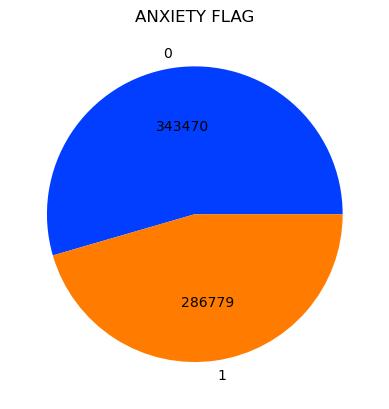

In [48]:
plt.pie(significant_dfanxiety['ANXIETYFLG'].value_counts().to_dict().values(), labels=significant_dfanxiety['ANXIETYFLG'].value_counts().to_dict().keys(), colors=palette_color, autopct=(lambda p: '{:.0f}'.format(p * len(significant_dfanxiety) / 100))) 
  
plt.title("ANXIETY FLAG")
plt.show() 

Training the Random Forest Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 2/8] START max_depth=50, min_samples_split=300, n_estimators=1000......
[CV 1/4; 2/8] END max_depth=50, min_samples_split=300, n_estimators=1000;, score=0.717 total time=11.1min
[CV 2/4; 5/8] START max_depth=90, min_samples_split=300, n_estimators=500.......
[CV 2/4; 5/8] END max_depth=90, min_samples_split=300, n_estimators=500;, score=0.718 total time= 5.9min


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV 3/4; 2/8] START max_depth=50, min_samples_split=300, n_estimators=1000......
[CV 3/4; 2/8] END max_depth=50, min_samples_split=300, n_estimators=1000;, score=0.719 total time=11.1min
[CV 3/4; 5/8] START max_depth=90, min_samples_split=300, n_estimators=500.......
[CV 3/4; 5/8] END max_depth=90, min_samples_split=300, n_estimators=500;, score=0.719 total time= 5.9min
[CV 2/4; 6/8] START max_depth=90, min_samples_split=300, n_estimators=1000......
[CV 2/4; 6/8] END max_depth=90, min_samples_split=300, n_estimators=1000;, score=0.718 total time=11.3min
[CV 3/4; 6/8] START max_depth=90, min_samples_split=300, n_estimators=1000......
[CV 3/4; 6/8] END max_depth=90, min_samples_split=300, n_estimators=1000;, score=0.719 total time=11.3min
[CV 4/4; 2/8] START max_depth=50, min_samples_split=300, n_estimators=1000......
[CV 4/4; 2/8] END max_depth=50, min_samples_split=300, n_estimators=1000;, score=0.717 total time=11.2min
[CV 4/4; 5/8] START max_depth=90, min_samples_split=300, n_estimat

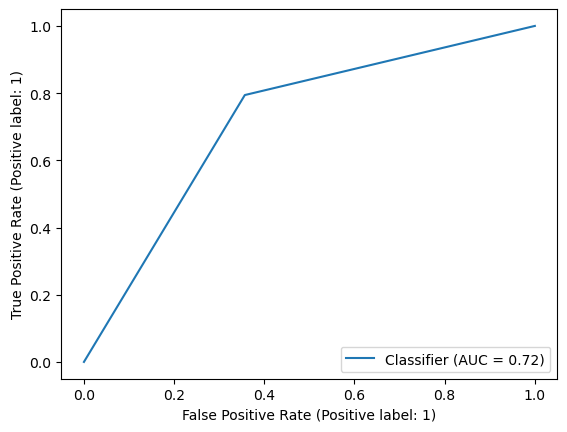

In [68]:
# Training Random. Forest Classifiers on each : 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


class_proportions = significant_dfadhd['ADHDFLG'].value_counts(normalize=True)

# Sample from each class
samples = []
for class_label, proportion in class_proportions.items():
    n_samples = int(len(significant_dfadhd) * proportion)
    samples.append(significant_dfadhd[significant_dfadhd['ADHDFLG'] == class_label].sample(n=n_samples, random_state=42))

# Concatenate all samples
sampled_df = pd.concat(samples)

X = sampled_df.drop('ADHDFLG', axis=1)
y = sampled_df['ADHDFLG']

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [50, 90],
    'min_samples_split': [300, 500]
}

# GridSearchCV for hyperparameter tuning
clf = GridSearchCV(rf, param_grid, cv=4, n_jobs=-1, verbose=10)

# Train the model
print("Training the Random Forest Classifier...")
clf.fit(X_train, y_train)
    
# Best parameters
print("Best parameters found: ", clf.best_params_)

# Predictions and evaluation
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the Logistic Regression Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py

Best parameters found:  {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.75      0.62      0.68     68694
           1       0.68      0.79      0.73     69600

    accuracy                           0.71    138294
   macro avg       0.71      0.71      0.70    138294
weighted avg       0.71      0.71      0.70    138294



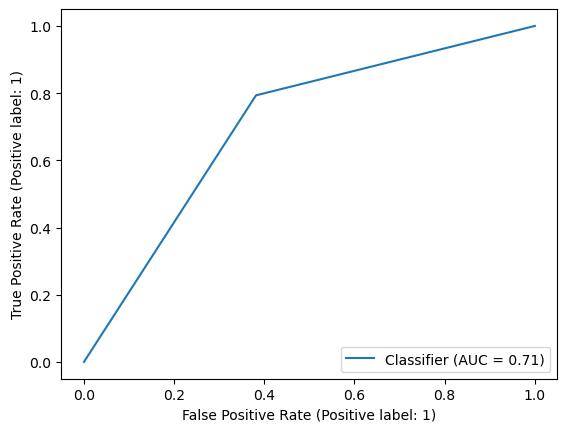

In [49]:
# Training Logistic Regression for ADHD

from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define hyperparameters grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for hyperparameter tuning for Logistic Regression
clf_lr = GridSearchCV(log_reg, param_grid_lr, cv=4, n_jobs=-1, verbose=10)

# Train the Logistic Regression model
print("Training the Logistic Regression Classifier...")
clf_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", clf_lr.best_params_)

# Predictions and evaluation
predictions = clf_lr.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

In [50]:
# Training SVC
from sklearn.svm import SVC

# Define the SVM model
svm = SVC()

# Define hyperparameters grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for hyperparameter tuning for SVM
clf_svm = GridSearchCV(svm, param_grid_svm, cv=4, n_jobs=-1, verbose=10)

# Train the SVM model
print("Training the SVM Classifier...")
clf_svm.fit(X_train, y_train)

print("Best parameters found: ", clf_svm.best_params_)

# Predictions and evaluation
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


Training the SVM Classifier...
Fitting 4 folds for each of 6 candidates, totalling 24 fits


KeyboardInterrupt: 

Training the Gradient Boosting Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 3/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 3/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.692 total time= 5.8min
[CV 4/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 4/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.709 total time= 9.2min
[CV 3/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 3/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.715 total time= 3.0min
[CV 4/4; 8/12] START learning_rate=0.1, max_depth=3, n_estimators=200...........
[CV 4/4; 8/12] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.715 total time= 6.0min


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV 2/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.685 total time= 2.9min
[CV 4/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 4/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.701 total time= 4.6min
[CV 4/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 4/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.712 total time= 6.1min
[CV 4/4; 6/12] START learning_rate=0.01, max_depth=7, n_estimators=200..........
[CV 4/4; 6/12] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.713 total time=12.1min
[CV 3/4; 10/12] START learning_rate=0.1, max_depth=5, n_estimators=200..........
[CV 3/4; 10/12] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.720 total time= 9.8min
[CV 2/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 

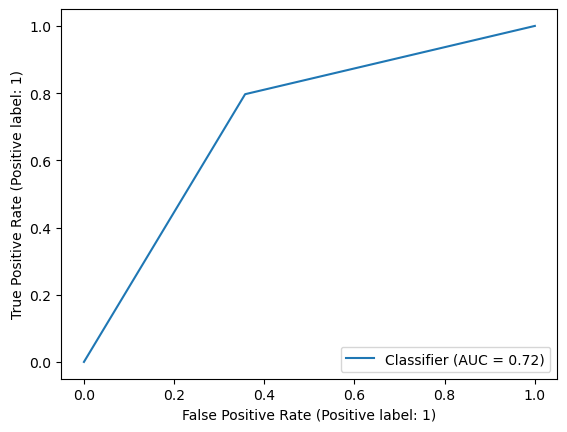

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the GBM model
gbm = GradientBoostingClassifier()

# Define hyperparameters grid for GBM
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for GBM
clf_gbm = GridSearchCV(gbm, param_grid_gbm, cv=4, n_jobs=-1, verbose=10)

# Train the GBM model
print("Training the Gradient Boosting Classifier...")
clf_gbm.fit(X_train, y_train)
print("Best parameters found: ", clf_gbm.best_params_)

# Predictions and evaluation
predictions = clf_gbm.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


Training the XGBoost Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 3/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.686 total time= 2.1min
[CV 1/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 1/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.702 total time= 3.3min
[CV 2/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 2/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.712 total time= 4.9min
[CV 4/4; 6/12] START learning_rate=0.01, max_depth=7, n_estimators=200..........
[CV 4/4; 6/12] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.713 total time= 9.8min
[CV 2/4; 10/12] START learning_rate=0.1, max_depth=5, n_estimators=200..........
[CV 2/4; 10/12] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.718 total time= 6.9min
[CV 4/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 

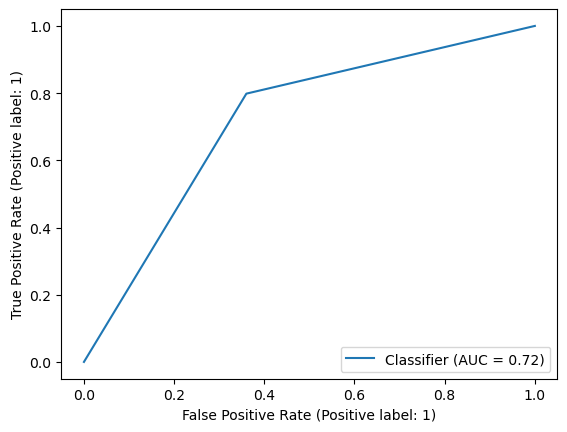

[CV 2/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 2/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.692 total time= 4.0min
[CV 2/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 2/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.711 total time= 6.4min
[CV 1/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 1/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.710 total time= 2.2min
[CV 1/4; 8/12] START learning_rate=0.1, max_depth=3, n_estimators=200...........
[CV 1/4; 8/12] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.714 total time= 4.0min
[CV 1/4; 9/12] START learning_rate=0.1, max_depth=5, n_estimators=100...........
[CV 1/4; 9/12] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.716 total time= 3.8min
[CV 1/4; 11/12] START learning_rate=0.1, max_depth=7, n_estimators=100..........
[CV 1/4

In [58]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for XGBoost
clf_xgb = GridSearchCV(xgb, param_grid_xgb, cv=4, n_jobs=-1, verbose=10)

# Train the XGBoost model
print("Training the XGBoost Classifier...")
clf_xgb.fit(X_train, y_train)
# Predictions and evaluation
predictions = clf_xgb.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


Training the Random Forest Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 2/4; 1/8] START max_depth=30, min_samples_split=300, n_estimators=300.......
[CV 2/4; 1/8] END max_depth=30, min_samples_split=300, n_estimators=300;, score=0.796 total time= 2.9min
[CV 2/4; 3/8] START max_depth=30, min_samples_split=500, n_estimators=300.......
[CV 2/4; 3/8] END max_depth=30, min_samples_split=500, n_estimators=300;, score=0.795 total time= 2.8min
[CV 2/4; 5/8] START max_depth=50, min_samples_split=300, n_estimators=300.......
[CV 2/4; 5/8] END max_depth=50, min_samples_split=300, n_estimators=300;, score=0.796 total time= 2.9min
[CV 1/4; 6/8] START max_depth=50, min_samples_split=300, n_estimators=500.......
[CV 1/4; 6/8] END max_depth=50, min_samples_split=300, n_estimators=500;, score=0.797 total time= 4.8min
[CV 3/4; 1/8] START max_depth=30, min_samples_split=300, n_estimators=300.......
[CV 3/4; 1/8] END max_depth=30, min_samples_split=300, n_estimators=300;, 

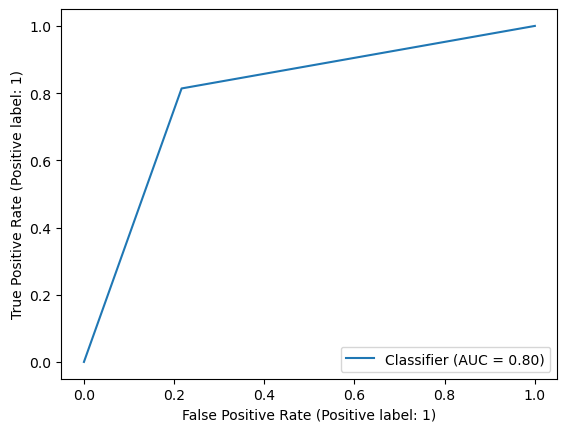

[CV 1/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 1/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.797 total time= 4.8min
[CV 1/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=500.......
[CV 1/4; 4/8] END max_depth=30, min_samples_split=500, n_estimators=500;, score=0.796 total time= 4.7min
[CV 1/4; 7/8] START max_depth=50, min_samples_split=500, n_estimators=300.......
[CV 1/4; 7/8] END max_depth=50, min_samples_split=500, n_estimators=300;, score=0.796 total time= 2.8min
[CV 1/4; 8/8] START max_depth=50, min_samples_split=500, n_estimators=500.......
[CV 1/4; 8/8] END max_depth=50, min_samples_split=500, n_estimators=500;, score=0.796 total time= 3.6min
[CV 3/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 3/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.797 total time= 4.8min
[CV 3/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=

In [60]:
# Training Random. Forest Classifiers on Depression : 

class_proportions = significant_dfdepress['DEPRESSFLG'].value_counts(normalize=True)

# Sample from each class
samples = []
for class_label, proportion in class_proportions.items():
    n_samples = int(len(significant_dfdepress) * proportion)
    samples.append(significant_dfdepress[significant_dfdepress['DEPRESSFLG'] == class_label].sample(n=n_samples, random_state=42))

# Concatenate all samples
sampled_df = pd.concat(samples)

X = sampled_df.drop('DEPRESSFLG', axis=1)
y = sampled_df['DEPRESSFLG']

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [30, 50],
    'min_samples_split': [300, 500]
}

# GridSearchCV for hyperparameter tuning
clf = GridSearchCV(rf, param_grid, cv=4, n_jobs=-1, verbose=10)

# Train the model
print("Training the Random Forest Classifier...")
clf.fit(X_train, y_train)
    
# Best parameters
print("Best parameters found: ", clf.best_params_)

# Predictions and evaluation
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the Logistic Regression Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py

Best parameters found:  {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     68694
           1       0.74      0.78      0.76     54266

    accuracy                           0.78    122960
   macro avg       0.78      0.78      0.78    122960
weighted avg       0.78      0.78      0.78    122960



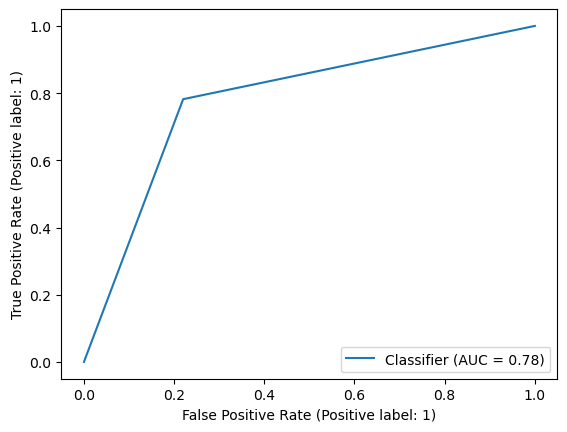

In [61]:
# Training Logistic Regression for DEPRESSION

from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define hyperparameters grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for hyperparameter tuning for Logistic Regression
clf_lr = GridSearchCV(log_reg, param_grid_lr, cv=4, n_jobs=-1, verbose=10)

# Train the Logistic Regression model
print("Training the Logistic Regression Classifier...")
clf_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", clf_lr.best_params_)

# Predictions and evaluation
predictions = clf_lr.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the Gradient Boosting Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 3/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 3/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.8s
[CV 1/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 1/4; 3/8] END ..............C=0.1, penalty=l1;, score=nan total time=   1.5s
[CV 1/4; 4/8] START C=0.1, penalty=l2...........................................
[CV 1/4; 4/8] END ............C=0.1, penalty=l2;, score=0.781 total time=   8.4s
[CV 2/4; 7/8] START C=10, penalty=l1............................................
[CV 2/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   0.6s
[CV 2/4; 8/8] START C=10, penalty=l2............................................
[CV 2/4; 8/8] END .............C=10, penalty=l2;, score=0.782 total time=   6.8s
[CV 3/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 4/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 4/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.8s
[CV 2/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 2/4; 3/8] END ..............C=0.1, penalty=l1;, score=nan total time=   1.5s
[CV 3/4; 4/8] START C=0.1, penalty=l2...........................................
[CV 3/4; 4/8] END ............C=0.1, penalty=l2;, score=0.781 total time=   8.1s
[CV 1/4; 7/8] START C=10, penalty=l1............................................
[CV 1/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   0.7s
[CV 1/4; 8/8] START C=10, penalty=l2............................................
[CV 1/4; 8/8] END .............C=10, penalty=l2;, score=0.781 total time=   6.2s
[CV 4/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 4/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.783 total time= 5.1min
[CV 4/4

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 4/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 4/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.782 total time=   8.0s
[CV 1/4; 5/8] START C=1, penalty=l1.............................................
[CV 1/4; 5/8] END ................C=1, penalty=l1;, score=nan total time=   0.6s
[CV 1/4; 6/8] START C=1, penalty=l2.............................................
[CV 1/4; 6/8] END ..............C=1, penalty=l2;, score=0.782 total time=   8.2s
[CV 1/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 1/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.783 total time= 5.0min
[CV 3/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 3/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.788 total time= 8.1min
[CV 3/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 3/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 2/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 2/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.781 total time=   8.2s
[CV 4/4; 5/8] START C=1, penalty=l1.............................................
[CV 4/4; 5/8] END ................C=1, penalty=l1;, score=nan total time=   0.6s
[CV 3/4; 6/8] START C=1, penalty=l2.............................................
[CV 3/4; 6/8] END ..............C=1, penalty=l2;, score=0.782 total time=   8.1s
[CV 2/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 2/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.782 total time= 5.0min
[CV 2/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 2/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.788 total time= 8.1min
[CV 4/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 4/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 3/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 3/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.781 total time=   8.1s
[CV 2/4; 5/8] START C=1, penalty=l1.............................................
[CV 2/4; 5/8] END ................C=1, penalty=l1;, score=nan total time=   0.6s
[CV 2/4; 6/8] START C=1, penalty=l2.............................................
[CV 2/4; 6/8] END ..............C=1, penalty=l2;, score=0.782 total time=   7.9s
[CV 1/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 1/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.778 total time= 2.5min
[CV 1/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 1/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.788 total time= 3.9min
[CV 1/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 1/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=10

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 1/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.9s
[CV 3/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 3/4; 3/8] END ..............C=0.1, penalty=l1;, score=nan total time=   1.4s
[CV 2/4; 4/8] START C=0.1, penalty=l2...........................................
[CV 2/4; 4/8] END ............C=0.1, penalty=l2;, score=0.782 total time=   8.6s
[CV 3/4; 7/8] START C=10, penalty=l1............................................
[CV 3/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   0.6s
[CV 3/4; 8/8] START C=10, penalty=l2............................................
[CV 3/4; 8/8] END .............C=10, penalty=l2;, score=0.782 total time=   6.9s
[CV 4/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 4/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.778 total time= 2.5min
[CV 4/4

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 1/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.781 total time=   8.2s
[CV 3/4; 5/8] START C=1, penalty=l1.............................................
[CV 3/4; 5/8] END ................C=1, penalty=l1;, score=nan total time=   0.6s
[CV 4/4; 6/8] START C=1, penalty=l2.............................................
[CV 4/4; 6/8] END ..............C=1, penalty=l2;, score=0.782 total time=   8.3s
[CV 2/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.777 total time= 2.5min
[CV 2/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 2/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.787 total time= 3.9min
[CV 2/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 2/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=10

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     68694
           1       0.75      0.81      0.78     54266

    accuracy                           0.80    122960
   macro avg       0.80      0.80      0.80    122960
weighted avg       0.80      0.80      0.80    122960



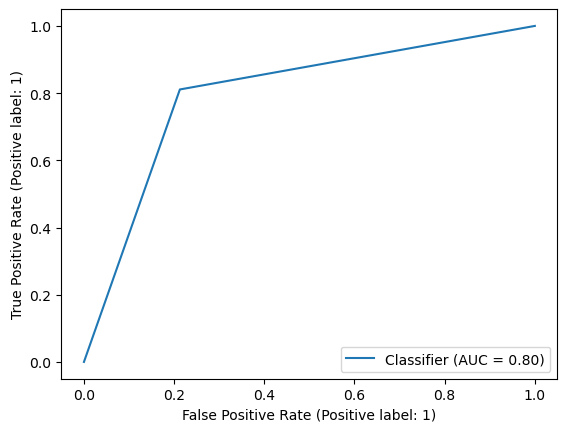

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the GBM model
gbm = GradientBoostingClassifier()

# Define hyperparameters grid for GBM
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for GBM
clf_gbm = GridSearchCV(gbm, param_grid_gbm, cv=4, n_jobs=-1, verbose=10)

# Train the GBM model
print("Training the Gradient Boosting Classifier...")
clf_gbm.fit(X_train, y_train)
print("Best parameters found: ", clf_gbm.best_params_)

# Predictions and evaluation
predictions = clf_gbm.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


Training the XGBoost Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 4/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.783 total time= 2.7min
[CV 3/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 3/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.787 total time= 6.0min
[CV 2/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 2/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.789 total time= 1.4min
[CV 2/4; 8/12] START learning_rate=0.1, max_depth=3, n_estimators=200...........
[CV 2/4; 8/12] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.794 total time= 3.2min
[CV 2/4; 9/12] START learning_rate=0.1, max_depth=5, n_estimators=100...........
[CV 2/4; 9/12] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.796 total time= 2.6min
[CV 3/4; 10/12] START learning_rate=0.1, max_depth=5, n_estimators=200..........
[CV 3/4

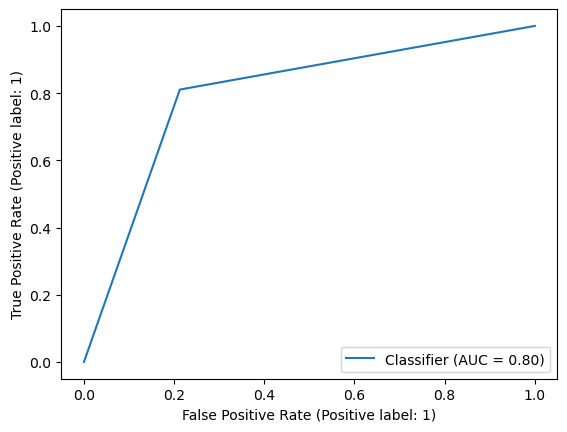

In [63]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for XGBoost
clf_xgb = GridSearchCV(xgb, param_grid_xgb, cv=4, n_jobs=-1, verbose=10)

# Train the XGBoost model
print("Training the XGBoost Classifier...")
clf_xgb.fit(X_train, y_train)
# Predictions and evaluation
predictions = clf_xgb.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


Training the Random Forest Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 1/8] START max_depth=30, min_samples_split=300, n_estimators=300.......
[CV 1/4; 1/8] END max_depth=30, min_samples_split=300, n_estimators=300;, score=0.743 total time= 2.7min
[CV 1/4; 3/8] START max_depth=30, min_samples_split=500, n_estimators=300.......
[CV 1/4; 3/8] END max_depth=30, min_samples_split=500, n_estimators=300;, score=0.742 total time= 2.6min
[CV 1/4; 5/8] START max_depth=50, min_samples_split=300, n_estimators=300.......
[CV 1/4; 5/8] END max_depth=50, min_samples_split=300, n_estimators=300;, score=0.743 total time= 2.8min
[CV 1/4; 6/8] START max_depth=50, min_samples_split=300, n_estimators=500.......
[CV 1/4; 6/8] END max_depth=50, min_samples_split=300, n_estimators=500;, score=0.743 total time= 4.7min
[CV 4/4; 1/8] START max_depth=30, min_samples_split=300, n_estimators=300.......
[CV 4/4; 1/8] END max_depth=30, min_samples_split=300, n_estimators=300;, 

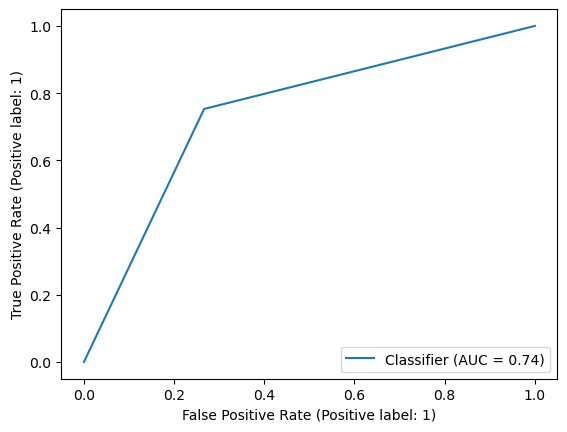

In [64]:
# Training Random. Forest Classifiers on each : 

class_proportions = significant_dfanxiety['ANXIETYFLG'].value_counts(normalize=True)

# Sample from each class
samples = []
for class_label, proportion in class_proportions.items():
    n_samples = int(len(significant_dfanxiety) * proportion)
    samples.append(significant_dfanxiety[significant_dfanxiety['ANXIETYFLG'] == class_label].sample(n=n_samples, random_state=42))

# Concatenate all samples
sampled_df = pd.concat(samples)

X = sampled_df.drop('ANXIETYFLG', axis=1)
y = sampled_df['ANXIETYFLG']

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [30, 50],
    'min_samples_split': [300, 500]
}

# GridSearchCV for hyperparameter tuning
clf = GridSearchCV(rf, param_grid, cv=4, n_jobs=-1, verbose=10)

# Train the model
print("Training the Random Forest Classifier...")
clf.fit(X_train, y_train)
    
# Best parameters
print("Best parameters found: ", clf.best_params_)

# Predictions and evaluation
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the Logistic Regression Classifier...
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py

Best parameters found:  {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     68694
           1       0.68      0.73      0.70     57356

    accuracy                           0.72    126050
   macro avg       0.72      0.72      0.72    126050
weighted avg       0.73      0.72      0.72    126050



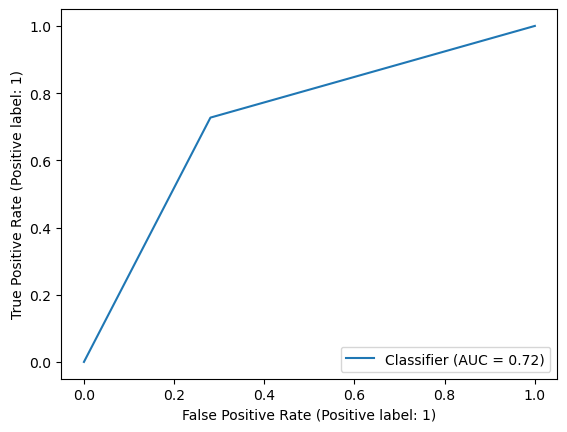

In [65]:
# Training Logistic Regression for DEPRESSION

from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define hyperparameters grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for hyperparameter tuning for Logistic Regression
clf_lr = GridSearchCV(log_reg, param_grid_lr, cv=4, n_jobs=-1, verbose=10)

# Train the Logistic Regression model
print("Training the Logistic Regression Classifier...")
clf_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", clf_lr.best_params_)

# Predictions and evaluation
predictions = clf_lr.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the Gradient Boosting Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 2/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 2/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.721 total time=   8.5s
[CV 3/4; 6/8] START C=1, penalty=l2.............................................
[CV 3/4; 6/8] END ..............C=1, penalty=l2;, score=0.722 total time=   8.1s
[CV 3/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 3/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.718 total time= 4.9min
[CV 1/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 1/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.737 total time= 7.7min
[CV 1/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 1/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.738 total time= 2.6min


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 3/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 3/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.719 total time=   8.8s
[CV 3/4; 7/8] START C=10, penalty=l1............................................
[CV 3/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   1.5s
[CV 4/4; 8/8] START C=10, penalty=l2............................................
[CV 4/4; 8/8] END .............C=10, penalty=l2;, score=0.725 total time=   7.5s
[CV 1/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 1/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.717 total time= 4.9min
[CV 2/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 2/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.738 total time= 7.7min
[CV 2/4; 7/12] START learning_rate=0.1, max_depth=3, n_estimators=100...........
[CV 2/4; 7/12] END learning_rate=0.1, max_depth=3, n_estimators=100

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 2/4; 8/12] START learning_rate=0.1, max_depth=3, n_estimators=200...........
[CV 2/4; 8/12] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.743 total time= 5.2min
[CV 4/4; 9/12] START learning_rate=0.1, max_depth=5, n_estimators=100...........
[CV 4/4; 9/12] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.744 total time= 4.1min
[CV 1/4; 11/12] START learning_rate=0.1, max_depth=7, n_estimators=100..........
[CV 1/4; 11/12] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.743 total time= 5.7min
[CV 4/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 4/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.721 total time=   8.8s
[CV 4/4; 7/8] START C=10, penalty=l1............................................
[CV 4/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   1.4s
[CV 3/4; 8/8] START C=10, penalty=l2............................................
[CV 3/4; 8/8] END .............C=10, penalty=l2;

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 3/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 3/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.741 total time= 4.5min
[CV 4/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=500.......
[CV 4/4; 4/8] END max_depth=30, min_samples_split=500, n_estimators=500;, score=0.744 total time= 4.5min
[CV 2/4; 7/8] START max_depth=50, min_samples_split=500, n_estimators=300.......
[CV 2/4; 7/8] END max_depth=50, min_samples_split=500, n_estimators=300;, score=0.743 total time= 2.7min
[CV 2/4; 8/8] START max_depth=50, min_samples_split=500, n_estimators=500.......
[CV 2/4; 8/8] END max_depth=50, min_samples_split=500, n_estimators=500;, score=0.743 total time= 3.3min
[CV 4/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 4/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.5s
[CV 2/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 2/4; 3/8]

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 1/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.743 total time= 4.5min
[CV 2/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=500.......
[CV 2/4; 4/8] END max_depth=30, min_samples_split=500, n_estimators=500;, score=0.743 total time= 4.6min
[CV 3/4; 7/8] START max_depth=50, min_samples_split=500, n_estimators=300.......
[CV 3/4; 7/8] END max_depth=50, min_samples_split=500, n_estimators=300;, score=0.740 total time= 2.7min
[CV 4/4; 8/8] START max_depth=50, min_samples_split=500, n_estimators=500.......
[CV 4/4; 8/8] END max_depth=50, min_samples_split=500, n_estimators=500;, score=0.744 total time= 3.2min
[CV 2/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 2/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.5s
[CV 1/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 1/4; 3/8]

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 4/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 4/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.745 total time= 4.5min
[CV 1/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=500.......
[CV 1/4; 4/8] END max_depth=30, min_samples_split=500, n_estimators=500;, score=0.742 total time= 4.5min
[CV 1/4; 7/8] START max_depth=50, min_samples_split=500, n_estimators=300.......
[CV 1/4; 7/8] END max_depth=50, min_samples_split=500, n_estimators=300;, score=0.742 total time= 2.7min
[CV 1/4; 8/8] START max_depth=50, min_samples_split=500, n_estimators=500.......
[CV 1/4; 8/8] END max_depth=50, min_samples_split=500, n_estimators=500;, score=0.742 total time= 3.3min
[CV 1/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 1/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.5s
[CV 3/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 3/4; 3/8]

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 2/4; 2/8] START max_depth=30, min_samples_split=300, n_estimators=500.......
[CV 2/4; 2/8] END max_depth=30, min_samples_split=300, n_estimators=500;, score=0.744 total time= 4.5min
[CV 3/4; 4/8] START max_depth=30, min_samples_split=500, n_estimators=500.......
[CV 3/4; 4/8] END max_depth=30, min_samples_split=500, n_estimators=500;, score=0.740 total time= 4.5min
[CV 4/4; 7/8] START max_depth=50, min_samples_split=500, n_estimators=300.......
[CV 4/4; 7/8] END max_depth=50, min_samples_split=500, n_estimators=300;, score=0.744 total time= 2.7min
[CV 3/4; 8/8] START max_depth=50, min_samples_split=500, n_estimators=500.......
[CV 3/4; 8/8] END max_depth=50, min_samples_split=500, n_estimators=500;, score=0.740 total time= 3.2min
[CV 3/4; 1/8] START C=0.01, penalty=l1..........................................
[CV 3/4; 1/8] END .............C=0.01, penalty=l1;, score=nan total time=   0.5s
[CV 4/4; 3/8] START C=0.1, penalty=l1...........................................
[CV 4/4; 3/8]

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/4; 2/8] START C=0.01, penalty=l2..........................................
[CV 1/4; 2/8] END ...........C=0.01, penalty=l2;, score=0.719 total time=   8.7s
[CV 2/4; 7/8] START C=10, penalty=l1............................................
[CV 2/4; 7/8] END ...............C=10, penalty=l1;, score=nan total time=   1.4s
[CV 2/4; 8/8] START C=10, penalty=l2............................................
[CV 2/4; 8/8] END .............C=10, penalty=l2;, score=0.725 total time=   7.5s
[CV 2/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.715 total time= 2.4min
[CV 2/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 2/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.733 total time= 3.8min
[CV 1/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 1/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=10

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.78      0.73      0.76     68694
           1       0.70      0.75      0.73     57356

    accuracy                           0.74    126050
   macro avg       0.74      0.74      0.74    126050
weighted avg       0.75      0.74      0.74    126050



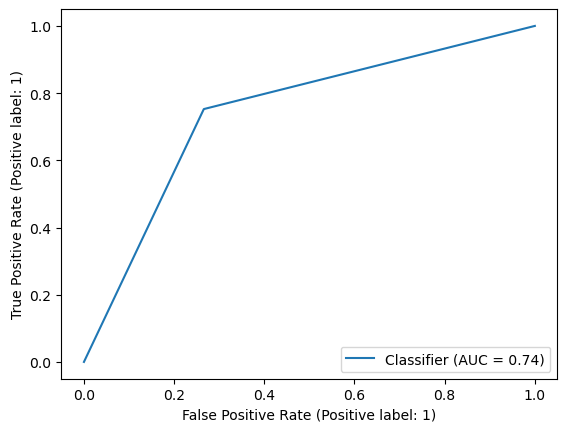

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the GBM model
gbm = GradientBoostingClassifier()

# Define hyperparameters grid for GBM
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for GBM
clf_gbm = GridSearchCV(gbm, param_grid_gbm, cv=4, n_jobs=-1, verbose=10)

# Train the GBM model
print("Training the Gradient Boosting Classifier...")
clf_gbm.fit(X_train, y_train)
print("Best parameters found: ", clf_gbm.best_params_)

# Predictions and evaluation
predictions = clf_gbm.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Training the XGBoost Classifier...
Fitting 4 folds for each of 12 candidates, totalling 48 fits


/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/mihir/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/4; 1/12] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 3/4; 1/12] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.699 total time= 1.5min
[CV 2/4; 3/12] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 2/4; 3/12] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.731 total time= 2.8min
[CV 1/4; 5/12] START learning_rate=0.01, max_depth=7, n_estimators=100..........
[CV 1/4; 5/12] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.737 total time= 4.7min
[CV 1/4; 6/12] START learning_rate=0.01, max_depth=7, n_estimators=200..........
[CV 1/4; 6/12] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.740 total time= 9.1min
[CV 2/4; 10/12] START learning_rate=0.1, max_depth=5, n_estimators=200..........
[CV 2/4; 10/12] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.745 total time= 7.1min
[CV 3/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 

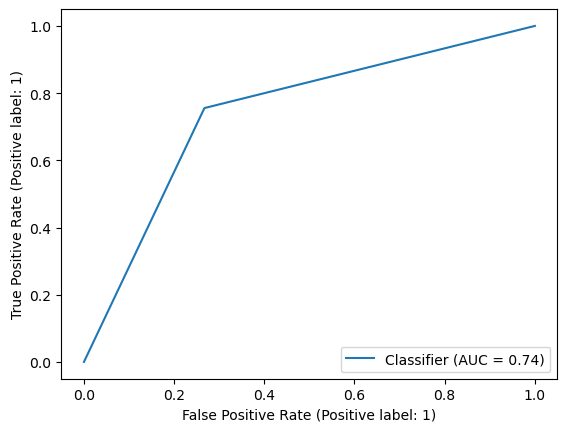

[CV 1/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 1/4; 2/12] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.716 total time= 2.9min
[CV 2/4; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=200..........
[CV 2/4; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.738 total time= 6.4min
[CV 3/4; 6/12] START learning_rate=0.01, max_depth=7, n_estimators=200..........
[CV 3/4; 6/12] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.738 total time= 8.9min
[CV 4/4; 10/12] START learning_rate=0.1, max_depth=5, n_estimators=200..........
[CV 4/4; 10/12] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.745 total time= 6.1min
[CV 1/4; 12/12] START learning_rate=0.1, max_depth=7, n_estimators=200..........
[CV 1/4; 12/12] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.743 total time= 6.6min
[CV 4/4; 2/12] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 

In [67]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning for XGBoost
clf_xgb = GridSearchCV(xgb, param_grid_xgb, cv=4, n_jobs=-1, verbose=10)

# Train the XGBoost model
print("Training the XGBoost Classifier...")
clf_xgb.fit(X_train, y_train)
# Predictions and evaluation
predictions = clf_xgb.predict(X_test)
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()


In [179]:
# Training XGBoost on each : 

from xgboost import XGBClassifier


class_proportions = significant_dfadhd['ADHDFLG'].value_counts(normalize=True)

samples = []
for class_label, proportion in class_proportions.items():
    n_samples = int(200000 * proportion)
    samples.append(significant_dfadhd[significant_dfadhd['ADHDFLG'] == class_label].sample(n=n_samples, random_state=42))

sampled_df = pd.concat(samples)

X = sampled_df.drop('ADHDFLG', axis=1)
y = sampled_df['ADHDFLG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [6, 12, 20, 30],
    'learning_rate': [0.2, 0.4, 0.6, 0.8]
}

clf = GridSearchCV(xgb, param_grid, cv=4, n_jobs=-1, verbose=10)

print("Training the XGBoost Classifier...")
clf.fit(X_train, y_train)

print("Best parameters found: ", clf.best_params_)
    
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


Training the XGBoost Classifier...
Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV 2/4; 2/9] START max_depth=6, n_estimators=200...............................
[CV 2/4; 2/9] END max_depth=6, n_estimators=200;, score=0.714 total time= 2.0min
[CV 4/4; 4/9] START max_depth=10, n_estimators=100..............................
[CV 4/4; 4/9] END max_depth=10, n_estimators=100;, score=0.716 total time= 1.7min
[CV 3/4; 5/9] START max_depth=10, n_estimators=200..............................
[CV 3/4; 5/9] END max_depth=10, n_estimators=200;, score=0.719 total time= 3.4min
[CV 2/4; 7/9] START max_depth=15, n_estimators=100..............................
[CV 2/4; 7/9] END max_depth=15, n_estimators=100;, score=0.711 total time= 2.8min
[CV 3/4; 9/9] START max_depth=15, n_estimators=300..............................
[CV 3/4; 9/9] END max_depth=15, n_estimators=300;, score=0.717 total time= 7.0min
[CV 1/4; 2/3] START learning_rate=0.1, max_depth=6, n_estimators=100............
[CV 1/4;